# COVID-19 Cases by Zip Code

In [1]:
# these are the Python packages being used for data collection and analysis
import datetime
import requests
import pandas as pd

# this is the URL that supplies the COVID data by zip code
URL = "https://services.arcgis.com/njFNhDsUCentVYJW/arcgis/rest/services/MDCOVID19_MASTER_ZIP_CODE_CASES/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json"

r = requests.get(URL)
r
# the output below will say <Response [200]> if the request succeeded
# if it says something else, try running the cell again

<Response [200]>

In [2]:
# this collects the relevant part of the response object and converts it
# into something we can turn into a dataframe (table)
json_list = []
for item in r.json()['features']:
  json_list.append(item['attributes'])

# this formats the dataframe to have zip code columns and date rows
df = pd.DataFrame(json_list)
df = df.set_index('ZIP_CODE')
df = df.transpose()
df = df.drop('OBJECTID')

# this function converts the odd date notation from the raw data into datetimes
def todate(s):
  date = pd.to_datetime(s.replace("_", "-").strip("Ftotal"))
  return date
df.index = df.index.map(todate)

# this drop zip codes with fewer than ten observations
# df = df.dropna(axis=1, thresh=10)
# it's commented out because we're not currently doing mass visualizations

# this checks whether today's data is included in the dataframe
if df.index[-1].date() == datetime.datetime.now(tz=datetime.timezone(datetime.timedelta(hours=-4))).date():
  print("Fresh data present, good to go")
else:
  print("Today's data is NOT present")

Today's data is NOT present


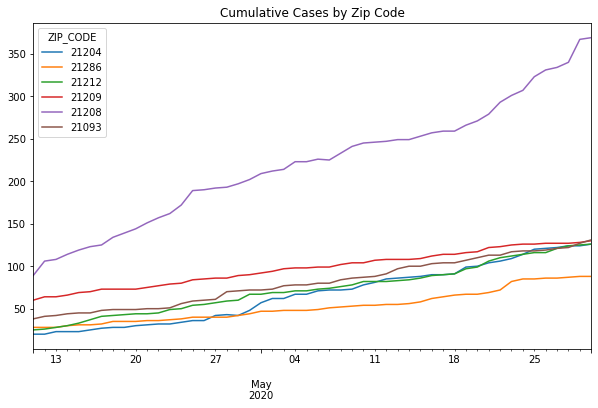

In [3]:
# these are the zip codes used for the visualization
# if you want to add more, make sure they're comma-separated and enclosed in quotes
codes = ['21204', '21286', '21212', '21209', '21208', '21093', ]

df[codes].plot.line(title="Cumulative Cases by Zip Code", figsize=(10,6));

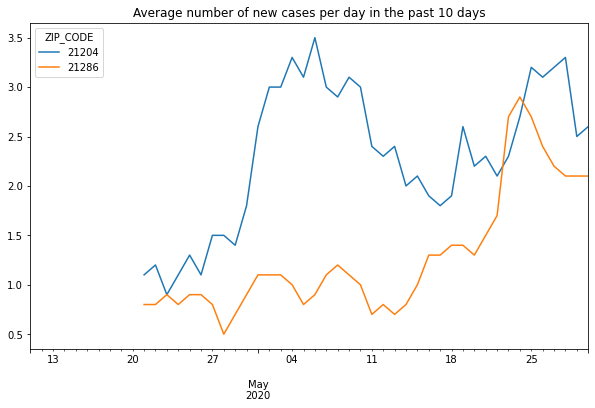

In [5]:
# to look at new cases over the past n days,
# set this variable to your desired value of n
past_days = 10

# these are the zip codes used for the visualization
# if you want to add more, make sure they're comma-separated and enclosed in quotes
codes2 = ['21204', '21286']

# this generates a new dataframe based on cumulative case count dataframe
# the value for a given (zip code, date) is equal to the number of new cases
# in that zip code in the past n days
df2 = df.diff(periods=past_days) / past_days

df2[codes2].plot.line(title=f"Average number of new cases per day in the past {past_days} days", figsize=(10,6));